# Exercise - Binary Classification with Perceptron

Classify vehicle mileage as high or low based on two features, weight and horsepower using Perceptron model. High mileage is 1 and low mileage is 0.

## Perform the following operations
1. Plot the scatter of weight vs horsepower. The vehicles with high mileage should be in blue color and low should be in red color. Give appropriate legends. 
2. Split the data set into training and testing data set. Use the train_test_split function to get a 80:20 split, using random_state 3. Plot a bar chart of number of 1's and 0's in the training dataset. 
3. Use the perceptron model to classify the data, and get predictions for test dataset.
4. Obtain the confusion matrix of the output.
5. Plot the separating hyperplane on the training dataset.
6. Consider a new test data. Weight values are 2, 3.3, 1.21, 5.32, 1.23, 4.8 and horsepower 20, 29, 13, 100, 40, 49 respectively, and mileage is 0, 0, 0, 1, 1, 1. Obtain the confusion matrix for this test data. 
7. Split the original dataset with 80:20 ratio again, but with random_state 299. Get the output of steps 3, 4, 5, 6. What is the difference from the previous output?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from io import StringIO
dataset =StringIO('''
weight,horsepower,mileage
1.4,43,1
1.5,8,0
2.71,44,1
3.55,23,0
2.5,15,0
2.9,19,0
3.85,112,1
3.96,87,1
4.62,108,1
4.7,21,0
2.67,34,1
2.5,20,0
1.932,12, 0
4.8,48,1
1.321,32,1
1.9013,52,1
4.13,19,0
2.8,29,0
''')
df = pd.read_csv(dataset)
df

,weight,horsepower,mileage
0,1.4000,43,1
1,1.5000,8,0
2,2.7100,44,1
3,3.5500,23,0
4,2.5000,15,0
5,2.9000,19,0
6,3.8500,112,1
7,3.9600,87,1
8,4.6200,108,1
9,4.7000,21,0


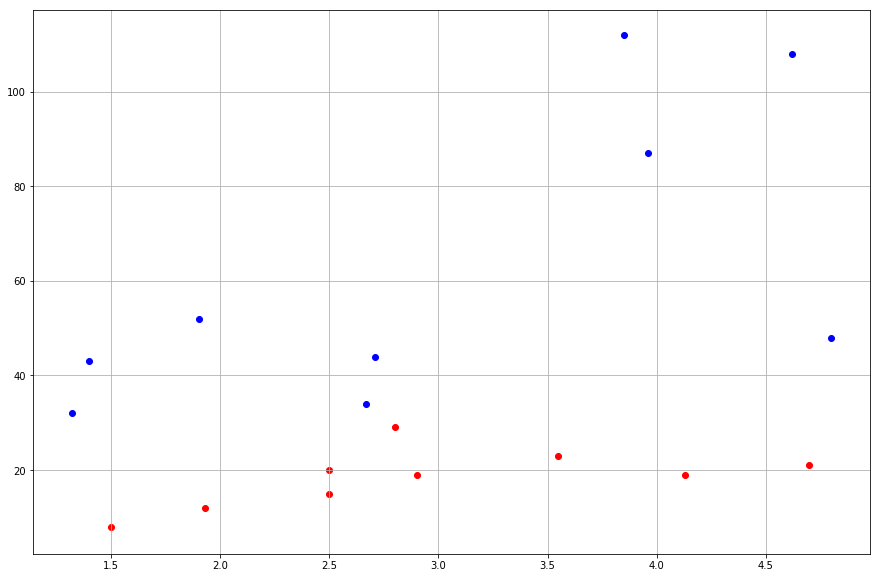

In [3]:
plt.figure(figsize=(15,10))
HIGH_M=df[df['mileage']==1]
LOW_M=df[df['mileage']==0]
plt.scatter(HIGH_M['weight'],HIGH_M['horsepower'],color='b',label='HIGH')
plt.scatter(LOW_M['weight'],LOW_M['horsepower'],color='r',label='LOW')
plt.grid()

<Container object of 2 artists>

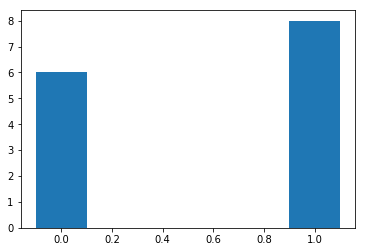

In [4]:
from sklearn.model_selection import train_test_split
ip_train,ip_test,op_train,op_test=train_test_split(df[['weight','horsepower']],df['mileage'],test_size=0.2,random_state=229)
barx=op_train.value_counts().index
bary=op_train.value_counts().tolist()
plt.bar(barx,bary,align='center', width=0.2)

In [5]:
from sklearn.linear_model import Perceptron
classifier=Perceptron(max_iter=1000)
model=classifier.fit(ip_train,op_train)
print(model.predict(ip_test))

[1 0 1 0]


In [6]:
#print(op_test)
print(model.predict(ip_test))

[1 0 1 0]


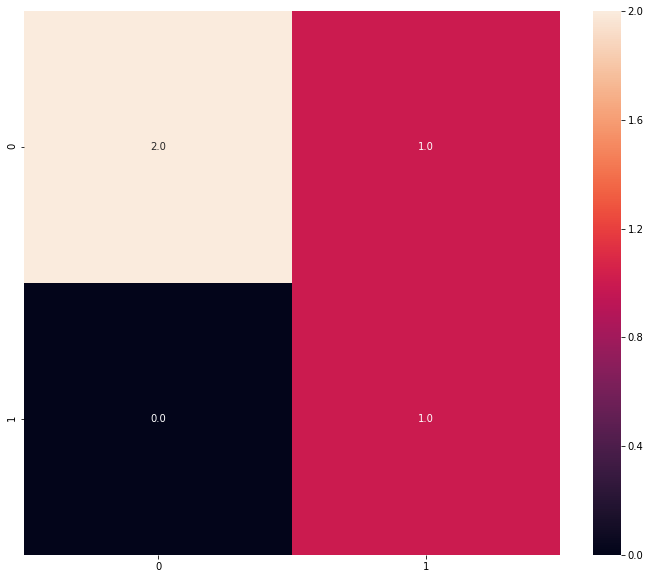

In [7]:
from sklearn import metrics
abc=metrics.confusion_matrix(op_test,model.predict(ip_test))
import seaborn as sb
plt.figure(figsize=(12,10))
sb.heatmap(abc,annot=True,fmt='.1f')

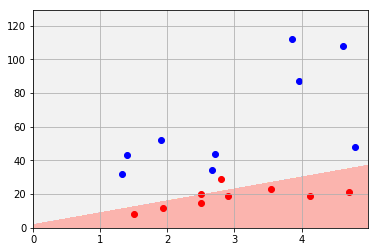

In [8]:
import numpy as np
x_min,x_max=0, 5
y_min,y_max=0, 129
xx,yy=np.meshgrid(np.arange(x_min,x_max,.01),np.arange(y_min,y_max,.01))
xx_lin=xx.ravel();#print(xx_lin[0:10]);
yy_lin=yy.ravel();#print(yy_lin[0:10]);
pred_input=np.c_[xx_lin,yy_lin];#print(pred_input[0:20])
Z=model.predict(pred_input);#print(Z);
Z=Z.reshape(xx.shape);#print(Z);
plt.contourf(xx,yy,Z,cmap=plt.cm.Pastel1)
plt.scatter(HIGH_M['weight'],HIGH_M['horsepower'],color='b',label='High')
plt.scatter(LOW_M['weight'],LOW_M['horsepower'],color='r',label='Low')
plt.grid([0,10,0,70])
#plt.grid()

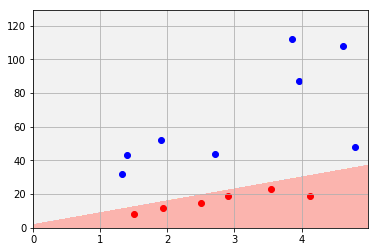

In [9]:
#plt.figure(figsize=(15,10))
train_HIGH_M=ip_train[op_train==1]
train_LOW_M=ip_train[op_train==0]
import numpy as np
x_min,x_max=0, 5
y_min,y_max=0, 129

train_HIGH_M=ip_train[op_train==1]

xx,yy=np.meshgrid(np.arange(x_min,x_max,.01),np.arange(y_min,y_max,.01))
xx_lin=xx.ravel();#print(xx_lin[0:10]);
yy_lin=yy.ravel();#print(yy_lin[0:10]);
pred_input=np.c_[xx_lin,yy_lin];#print(pred_input[0:20])
Z=model.predict(pred_input);#print(Z);
Z=Z.reshape(xx.shape);#print(Z);
plt.contourf(xx,yy,Z,cmap=plt.cm.Pastel1)
plt.scatter(train_HIGH_M['weight'],train_HIGH_M['horsepower'],color='b',label='High')
plt.scatter(train_LOW_M['weight'],train_LOW_M['horsepower'],color='r',label='Low')
plt.grid([0,10,0,70])

In [10]:
from io import StringIO
dataset =StringIO('''
weight,horsepower,mileage
2,20,0
3.3,29,0
1.21,13,0
5.32,100,1
1.23,40,1
4.8,49,1
''')
df1 = pd.read_csv(dataset)
df1

,weight,horsepower,mileage
0,2.00,20,0
1,3.30,29,0
2,1.21,13,0
3,5.32,100,1
4,1.23,40,1
5,4.80,49,1


0    0
1    0
2    0
3    1
4    1
5    1
Name: mileage, dtype: int64


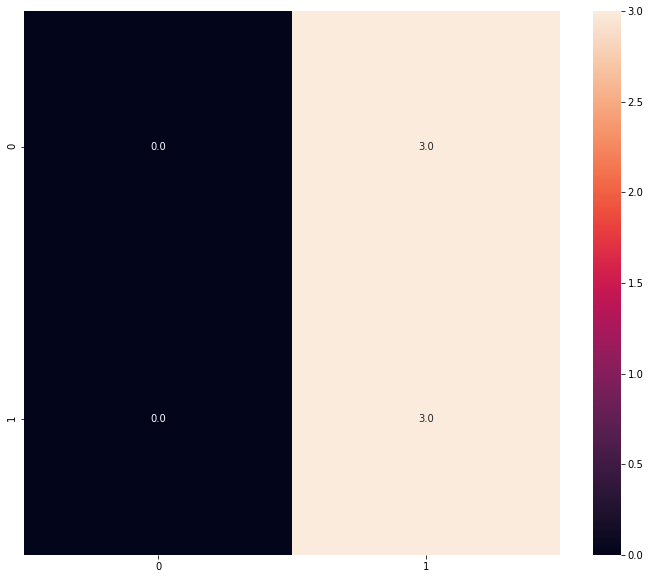

In [13]:
from sklearn import metrics
#print(df1['mileage'])
#df[['weight','horsepower']]
abc=metrics.confusion_matrix(df1['mileage'],model.predict(df1[['weight','horsepower']]))
import seaborn as sb
plt.figure(figsize=(12,10))
sb.heatmap(abc,annot=True,fmt='.1f')

In [12]:
from sklearn.model_selection import train_test_split
ip_train,ip_test,op_train,op_test=train_test_split(df[['weight','horsepower']],df['mileage'],test_size=0.2,random_state=299)
print(op_test)
print(model.predict(ip_test))

13    1
8     1
4     0
6     1
Name: mileage, dtype: int64
[1 1 0 1]
